## データの取り込みと確認

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [5]:
# データの取り込み
df_master = pd.read_csv("customer_segment_analysis_data.csv")
df = df_master.copy()
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
1,465025,Male,Yes,73,Yes,Executive,0.0,High,2.0,Cat_6,C
2,461687,Female,Yes,77,Yes,Artist,0.0,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
4,459591,Male,Yes,50,Yes,Artist,1.0,Average,3.0,Cat_6,C


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [6]:
#データの欠損と型の確認(info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   object 
 2   Ever_Married     6338 non-null   object 
 3   Age              6454 non-null   int64  
 4   Graduated        6396 non-null   object 
 5   Profession       6355 non-null   object 
 6   Work_Experience  5781 non-null   float64
 7   Spending_Score   6454 non-null   object 
 8   Family_Size      6190 non-null   float64
 9   Var_1            6392 non-null   object 
 10  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 554.8+ KB


In [8]:
#データ要約確認(describe)
display(df.describe())
display(df.describe(include="object"))

,ID,Age,Work_Experience,Family_Size
count,6454.000000,6454.000000,5781.000000,6190.000000
mean,463493.070964,43.235203,2.604048,2.862036
std,2583.148482,16.693985,3.362028,1.529702
min,458982.000000,18.000000,0.000000,1.000000
25%,461285.250000,30.000000,0.000000,2.000000
50%,463506.500000,40.000000,1.000000,3.000000
75%,465735.750000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,6454,6338,6396,6355,6454,6392,6454
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,3563,3690,3960,1980,3886,4211,1843


## 課題1. 各セグメンテーションの人数と構成比率はどれくらいか？ 

セグメンテーション毎の顧客数の確認する  
セグメンテーション毎の顧客数の構成比率の算出する  

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_92607/1342399854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Segmentation",data=df,palette="Blues",order=["A","B","C","D"])


<Axes: xlabel='Segmentation', ylabel='count'>

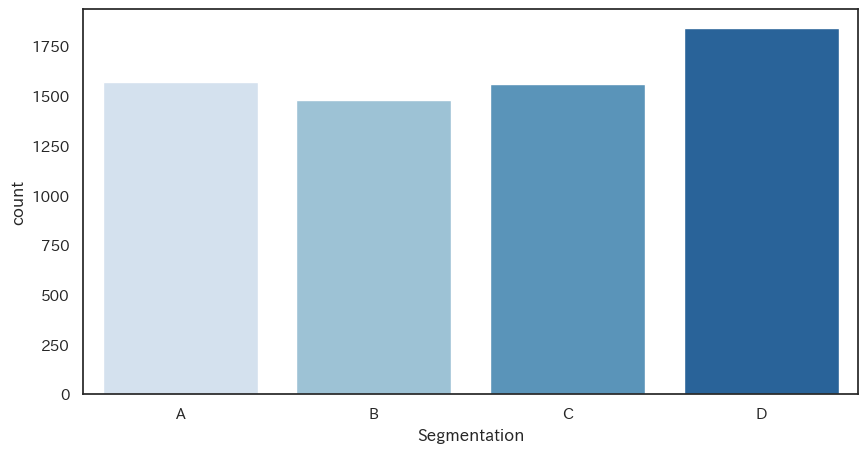

In [10]:
#各セグメンテーションの人数を棒グラフで確認
sns.countplot(x="Segmentation",data=df,palette="Blues",order=["A","B","C","D"])

In [14]:
#セグメンテーション別の顧客数と構成比率を算出
df_segment_rate = df.groupby("Segmentation",as_index=False).count()[["Segmentation","ID"]]
df_segment_rate.columns = ["Segmentation","segment_count"]
df_segment_rate["segment_rate"] = df_segment_rate["segment_count"]/df["ID"].count()
df_segment_rate

,Segmentation,segment_count,segment_rate
0,A,1571,0.243415
1,B,1480,0.229315
2,C,1560,0.241711
3,D,1843,0.285559


## 課題2. 各セグメンテーションの顧客はどのような顧客なのか？

Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1と定期預金契約との関係性を確認する  
→連続変数はセグメント毎に上記の変数の箱ひげ図orバイオリンプロットを作成する + 統計値(平均など)の差を確認する  
→カテゴリー変数はセグメント×カテゴリーで人数や比率を棒グラフや集計値で確認する  

,Segmentation,Gender,count,rate
0,A,Female,723,0.460216
1,A,Male,848,0.539784
2,B,Female,682,0.460811
3,B,Male,798,0.539189
4,C,Female,713,0.457051
5,C,Male,847,0.542949
6,D,Female,773,0.419425
7,D,Male,1070,0.580575


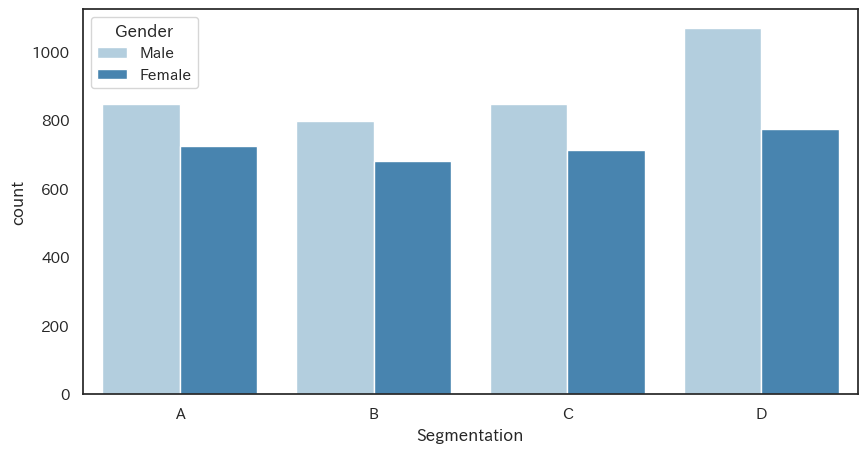

In [20]:
#Gender
target = "Gender"
sns.countplot(x="Segmentation",hue=target,data=df,palette="Blues",order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation",target],as_index=False).count()[["Segmentation",target,"ID"]]
df_rate.columns = ["Segmentation",target,"count"]
df_rate = pd.merge(df_rate,df_segment_rate,on="Segmentation",how="left")
df_rate["rate"] = df_rate["count"]/df_rate["segment_count"]
df_rate[["Segmentation",target,"count","rate"]]

,Segmentation,Ever_Married,count,rate
0,A,No,640,0.407384
1,A,Yes,902,0.574157
2,B,No,382,0.258108
3,B,Yes,1071,0.723649
4,C,No,315,0.201923
5,C,Yes,1224,0.784615
6,D,No,1311,0.711340
7,D,Yes,493,0.267499


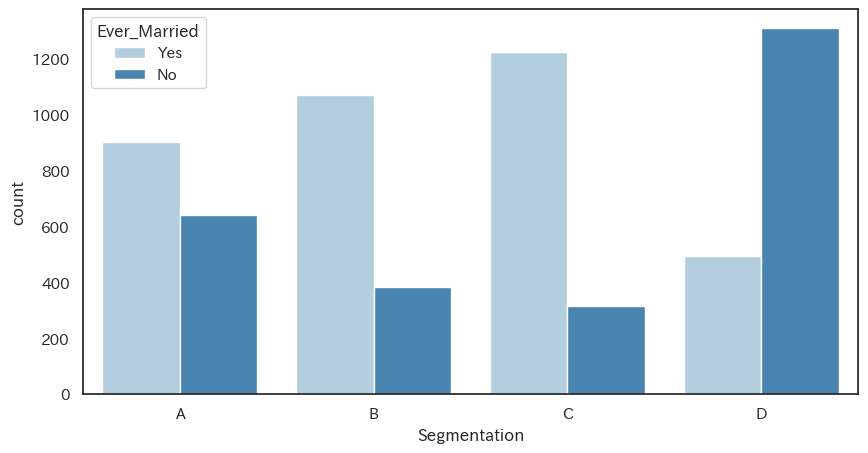

In [24]:
#Ever_Married
target = "Ever_Married"
sns.countplot(x="Segmentation", hue=target, data=df, palette="Blues", order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation", target], as_index=False).count()[["Segmentation", target, "ID"]]
df_rate.columns = ["Segmentation", target, "count"] #セグメント×性別ごとの人数を算出
df_rate = pd.merge(df_rate, df_segment_rate, on="Segmentation", how="left") #セグメントの合計人数をjoin
df_rate["rate"] = df_rate["count"] / df_rate["segment_count"] #セグメント内の男女比率を算出
df_rate[["Segmentation", target, "count", "rate"]]



/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_92607/2588730814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Segmentation", y=target, data=df, palette="Blues", order=["A", "B", "C", "D"]) #バイオリンプロット


,count,mean,std,min,25%,50%,75%,max
Segmentation,,,,,,,,
A,1571.0,44.717377,16.322048,18.0,32.5,41.0,52.0,89.0
B,1480.0,47.979730,14.758717,18.0,37.0,46.0,58.0,89.0
C,1560.0,49.087821,14.493567,18.0,38.0,49.0,58.0,89.0
D,1843.0,33.207813,15.716016,18.0,22.0,29.0,37.0,89.0


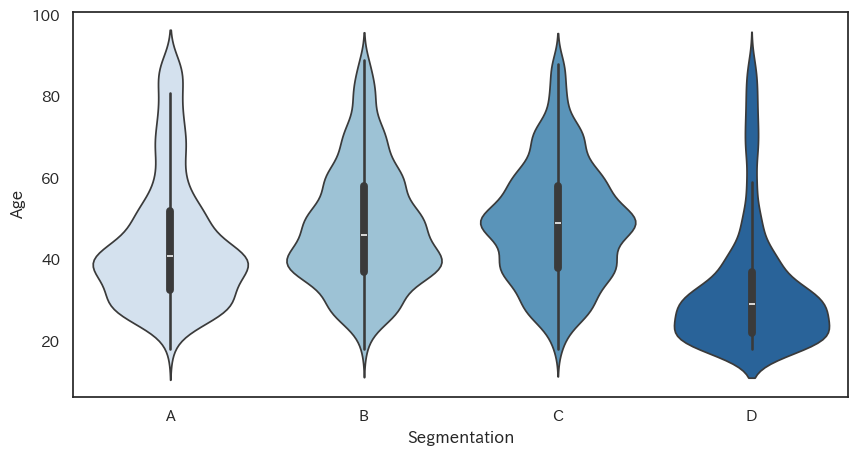

In [26]:
#Age
target = "Age"
sns.violinplot(x="Segmentation", y=target, data=df, palette="Blues", order=["A", "B", "C", "D"]) #バイオリンプロット
df.groupby("Segmentation").describe()[target]

,Segmentation,Graduated,count,rate
0,A,No,587,0.373647
1,A,Yes,967,0.615532
2,B,No,408,0.275676
3,B,Yes,1057,0.714189
4,C,No,276,0.176923
5,C,Yes,1272,0.815385
6,D,No,1165,0.632122
7,D,Yes,664,0.360282


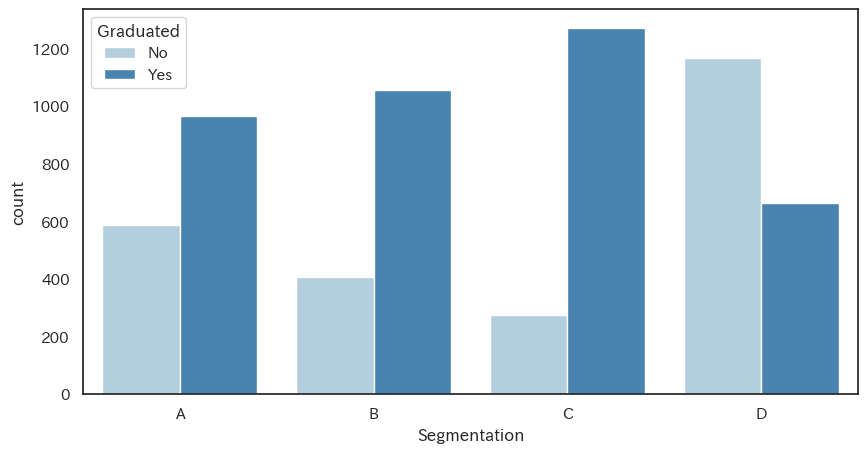

In [25]:
#Graduated
target = "Graduated"
sns.countplot(x="Segmentation", hue=target, data=df, palette="Blues", order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation", target], as_index=False).count()[["Segmentation", target, "ID"]]
df_rate.columns = ["Segmentation", target, "count"] #セグメント×性別ごとの人数を算出
df_rate = pd.merge(df_rate, df_segment_rate, on="Segmentation", how="left") #セグメントの合計人数をjoin
df_rate["rate"] = df_rate["count"] / df_rate["segment_count"] #セグメント内の男女比率を算出
df_rate[["Segmentation", target, "count", "rate"]]

,Segmentation,Profession,count,rate
0,A,Artist,432,0.274984
1,A,Doctor,155,0.098663
2,A,Engineer,203,0.129217
3,A,Entertainment,297,0.189052
4,A,Executive,103,0.065563
5,A,Healthcare,84,0.053469
6,A,Homemaker,61,0.038829
7,A,Lawyer,161,0.102482
8,A,Marketing,48,0.030554
9,B,Artist,595,0.402027


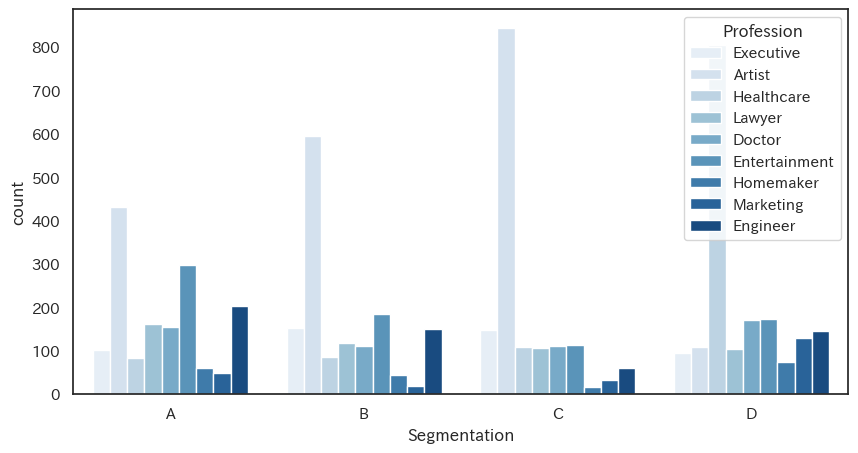

In [27]:
#Profession
target = "Profession"
sns.countplot(x="Segmentation", hue=target, data=df, palette="Blues", order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation", target], as_index=False).count()[["Segmentation", target, "ID"]]
df_rate.columns = ["Segmentation", target, "count"] #セグメント×性別ごとの人数を算出
df_rate = pd.merge(df_rate, df_segment_rate, on="Segmentation", how="left") #セグメントの合計人数をjoin
df_rate["rate"] = df_rate["count"] / df_rate["segment_count"] #セグメント内の男女比率を算出
df_rate[["Segmentation", target, "count", "rate"]]


In [12]:
#Work_Experience
target = "Work_Experience"
sns.violinplot(x="Segmentation", y=target, data=df, palette="Blues", order=["A", "B", "C", "D"]) #バイオリンプロット
df.groupby("Segmentation").describe()[target]

In [13]:
#Spending_Score
target = "Spending_Score"
sns.countplot(x="Segmentation", hue=target, data=df, palette="Blues", order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation", target], as_index=False).count()[["Segmentation", target, "ID"]]
df_rate.columns = ["Segmentation", target, "count"] #セグメント×性別ごとの人数を算出
df_rate = pd.merge(df_rate, df_segment_rate, on="Segmentation", how="left") #セグメントの合計人数をjoin
df_rate["rate"] = df_rate["count"] / df_rate["segment_count"] #セグメント内の男女比率を算出
df_rate[["Segmentation", target, "count", "rate"]]

In [14]:
#Family_Size
target = "Family_Size"
sns.violinplot(x="Segmentation", y=target, data=df, palette="Blues", order=["A", "B", "C", "D"]) #バイオリンプロット
df.groupby("Segmentation").describe()[target]

In [15]:
#Var_1
target = "Var_1"
sns.countplot(x="Segmentation", hue=target, data=df, palette="Blues", order=["A", "B", "C", "D"])
df_rate = df.groupby(["Segmentation", target], as_index=False).count()[["Segmentation", target, "ID"]]
df_rate.columns = ["Segmentation", target, "count"] #セグメント×性別ごとの人数を算出
df_rate = pd.merge(df_rate, df_segment_rate, on="Segmentation", how="left") #セグメントの合計人数をjoin
df_rate["rate"] = df_rate["count"] / df_rate["segment_count"] #セグメント内の男女比率を算出
df_rate[["Segmentation", target, "count", "rate"]]

## 課題3. マーケティング部が設定しているセグメンテーションは適切か？他によりよいセグメント基準がありそうか？

この課題はデータ分析の結果をビジネスに活かす力をつけるための練習課題です。  
まずは、このセグメントがビジネスに使えるとしたら、どんなパターンがありそうか、自由に考えてみましょう。  
つぎに、このセグメントの問題点を考えてみましょう。
最後に、もっとマーケティング部に役立ちそうなセグメントを作るとしたら、どんなセグメントがありそうか考えてみましょう。  

## 分析の結論

課題1.各セグメンテーションの人数と構成比率

##### Dが少し多いがほぼ均等
##### D,A,C,Bの順に人数が多い
##### 各セグメントの人数は約15001800人、構成比率は2328%
##### 詳細は下記集計表参照

課題2.各セグメントの特徴  

##### A：30~40代、大卒、Artist、一人or二人暮らし
##### B：既婚、40~50代、大卒、Artist
##### C：既婚、40~50代、大卒、Artist、支出が比較的多い
##### D：未婚、20代、学歴は低め、Healthcare関連の職種、支出が少ない、実家暮らし

課題3.このセグメントは適切か？

##### ベーシックプランとプレミアムプランで出し分けてプロモーションをするならSpending_score×学歴×年齢の組み合わせで経済力別のセグメントを作る
##### 通常プランとビジネスプラン(for Biz)で出し分けるなら職業(Executiveか否か)×年齢の組み合わせで社内地位別のセグメントを作る
##### ペルソナベースでユーザーの心理をつくプロモーションをしていくなら、年齢×性別の組み合わせでデモグラ別のセグメントを作る
##### 結局のところ、マーケティング部がどのようなプロモーションを考えるかによって適切なセグメントも変わるため、実務なら上記の分析結果をもとにマーケティング部に入念なヒアリングを行うのもあり